

# Powerlifting (load and EDA )



 ## Import Dataset

In [4]:
# from kaggle with Token
from google.colab import files
uploaded =files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d waqi786/powerlifting-data
!unzip powerlifting-data.zip


Saving power_lifting .ipynb to power_lifting .ipynb
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/waqi786/powerlifting-data
License(s): apache-2.0
  0% 0.00/17.1k [00:00<?, ?B/s]
100% 17.1k/17.1k [00:00<00:00, 33.1MB/s]
Archive:  powerlifting-data.zip
  inflating: powerlifting_dataset.csv  


## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [8]:
df=pd.read_csv('powerlifting_dataset.csv')
df.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [9]:
 # The dataset contains 3000 rows and 5 columns
df.shape

(3000, 5)

In [10]:
# Display the last 5 rows of the dataset
df.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [11]:
# Display 5 random samples from the dataset
df.sample(5)

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
1871,Jane Smith,34,105 kg,Bench Press,245
2208,John Doe,40,120 kg,Squat,367
61,Jane Smith,27,59 kg,Squat,290
2556,John Doe,18,59 kg,Bench Press,339
1014,Daniel Lee,33,66 kg,Bench Press,127


In [12]:
#information about dtype,null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [13]:
# Summary statistics for numerical columns
df.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [14]:
# Display all column names in the dataset
df.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

In [15]:
# Select and display names of numerical columns
numerical_cols =df.select_dtypes(include='number').columns
numerical_cols

Index(['Age', 'Amount Lifted (kg)'], dtype='object')

In [16]:
# Select and display names of categorical columns
cat_cols=df.select_dtypes(exclude='number').columns   # use exclude
cat_cols

Index(['Lifter Name', 'Weight Class', 'Lift Type'], dtype='object')

In [17]:
# Correlation between numerical features
df[numerical_cols].corr()

,Age,Amount Lifted (kg)
Age,1.000000,-0.013701
Amount Lifted (kg),-0.013701,1.000000


In [18]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()

1

## check duplicate

In [19]:
# Remove duplicate
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## Null handling

In [20]:
#Check nulls
df.isnull().sum()

,0
Lifter Name,0
Age,0
Weight Class,0
Lift Type,0
Amount Lifted (kg),0


In [ ]:
df.to_csv('powerlifting_dataset.csv',index=False)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         2999 non-null   object
 1   Age                 2999 non-null   int64 
 2   Weight Class        2999 non-null   object
 3   Lift Type           2999 non-null   object
 4   Amount Lifted (kg)  2999 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 140.6+ KB


In [22]:
# Count the number of cells with the value 'Open'
df['Weight Class'].str.contains('Open').sum()

356

In [23]:
# Remove the 'kg' unit from the 'Weight Class' column values
df['Weight Class'] = df['Weight Class'].str.replace(' kg', '', regex=False)


In [32]:
# Convert the 'Weight Class' column to numeric values and filling NaNs with the median value
df['Weight Class'] = pd.to_numeric(df['Weight Class'], errors='coerce')
df['Weight Class'] = df['Weight Class'].fillna(df['Weight Class'].median())

In [33]:
# Display the 'Weight Class' column after replacing 'Open' values with the median
print(df['Weight Class'])


0        59.0
1        83.0
2       105.0
3        66.0
4        74.0
        ...  
2995     74.0
2996     83.0
2997     83.0
2998     93.0
2999     83.0
Name: Weight Class, Length: 2999, dtype: float64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lifter Name         2999 non-null   object 
 1   Age                 2999 non-null   int64  
 2   Weight Class        2999 non-null   float64
 3   Lift Type           2999 non-null   object 
 4   Amount Lifted (kg)  2999 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 140.6+ KB


In [35]:
# numerical columns after converting the 'Weight Class' column to numeric
numerical_cols =df.select_dtypes(include='number').columns
numerical_cols

Index(['Age', 'Weight Class', 'Amount Lifted (kg)'], dtype='object')

In [36]:
#  categorical columns after converting 'Weight Class' to numeric using exclude='number'
cat_cols=df.select_dtypes(exclude='number').columns   # use exclude
cat_cols

Index(['Lifter Name', 'Lift Type'], dtype='object')

In [37]:
# Recalculat the correlation matrix for numerical columns after converting 'Weight Class' to numeric
df[numerical_cols].corr()

,Age,Weight Class,Amount Lifted (kg)
Age,1.000000,0.006156,-0.014435
Weight Class,0.006156,1.000000,0.011250
Amount Lifted (kg),-0.014435,0.011250,1.000000


## Skewness handling

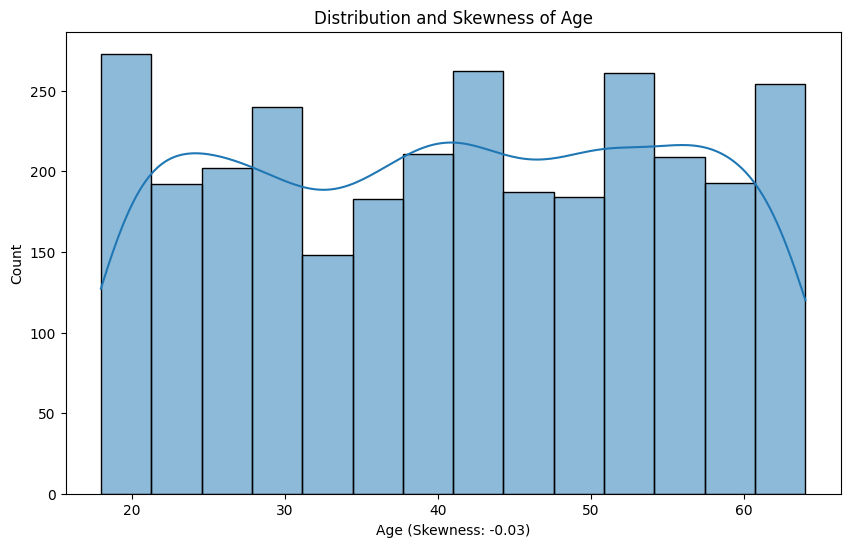

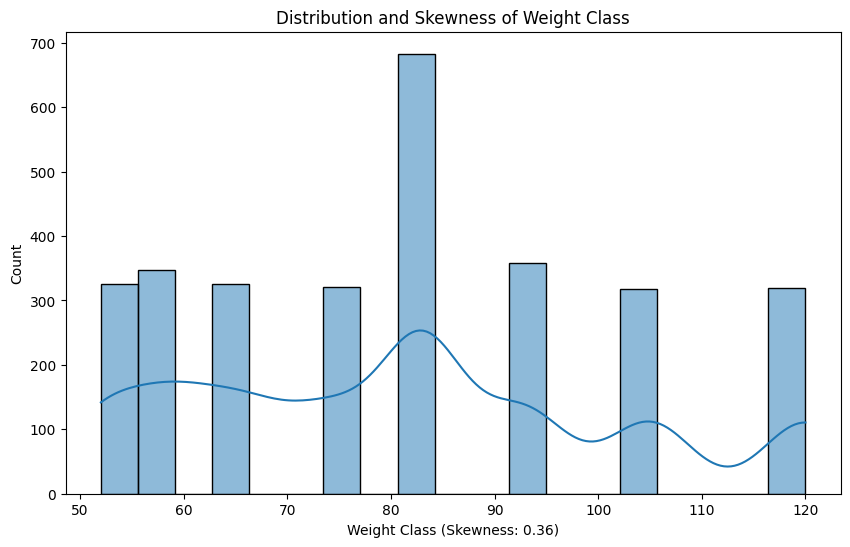

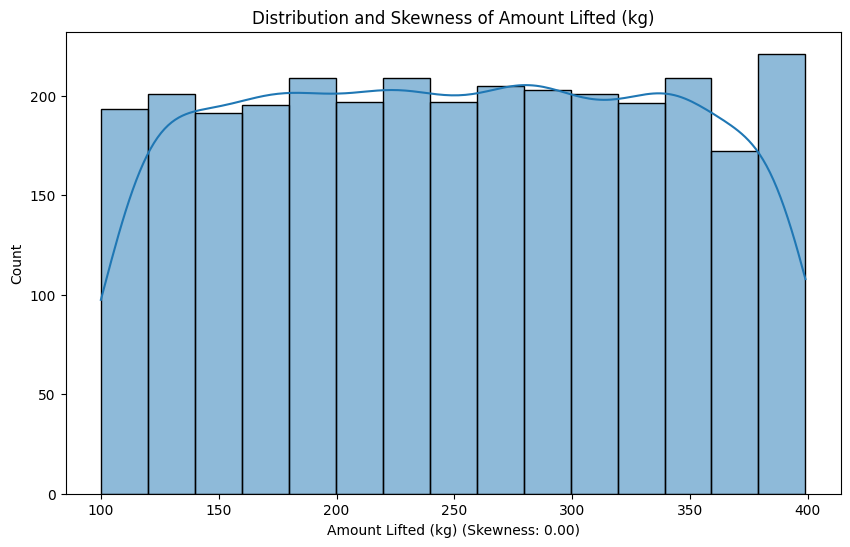

In [38]:
# skewness for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution and Skewness of {col}')
    skewness = df[col].skew()
    plt.xlabel(f'{col} (Skewness: {skewness:.2f})')
    plt.show()

In [46]:
from scipy import stats
import numpy as np

def simple_skewness_handler(df, threshold=0.0):
    transformed_df = df.copy()

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        skewness = data.skew()

        if abs(skewness) > threshold:
            if (data == 0).sum() / len(data) > 0.1:
                data = data[data != 0]
                transformed_df[col] = np.log1p(data)
            else:
                transformed_df[col], _ = stats.boxcox(data + abs(data.min()) + 1)

    return transformed_df


In [47]:
transformed_df = simple_skewness_handler(df)


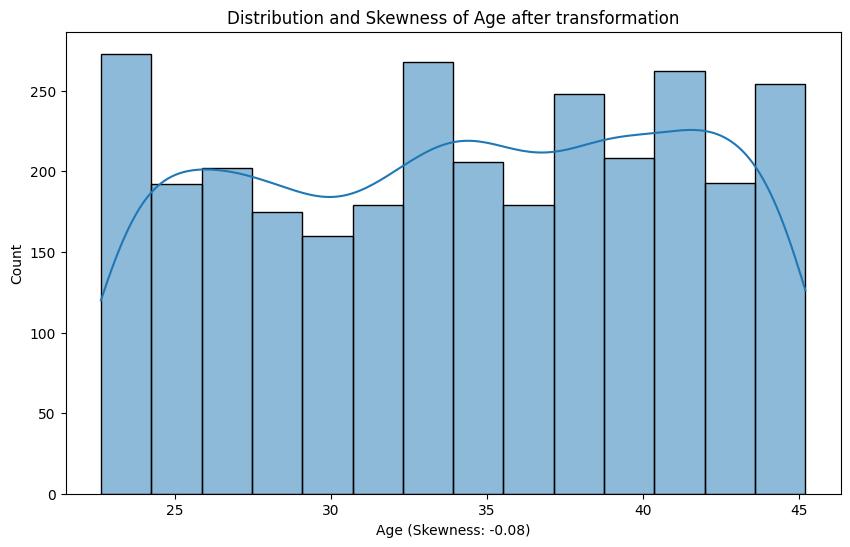

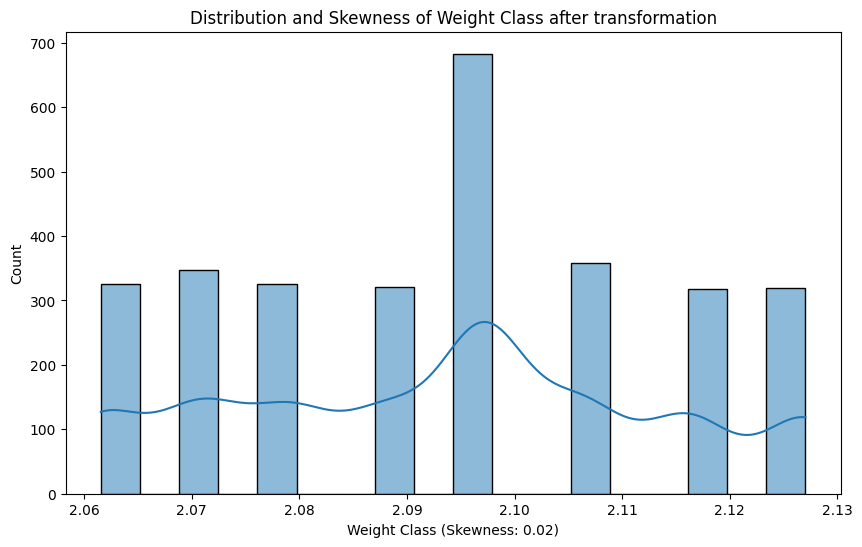

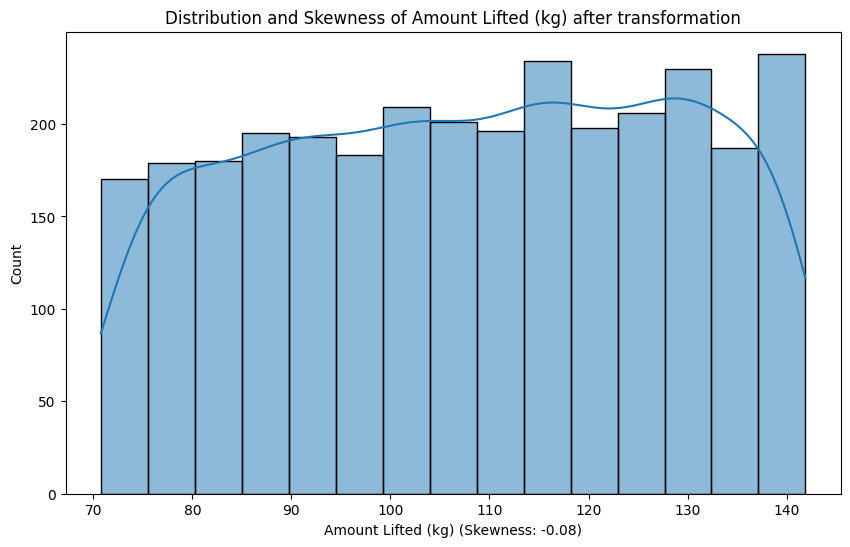

In [48]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(transformed_df[col], kde=True)
    plt.title(f'Distribution and Skewness of {col} after transformation')
    skewness = transformed_df[col].skew()
    plt.xlabel(f'{col} (Skewness: {skewness:.2f})')
    plt.show()

## Outlier Handling

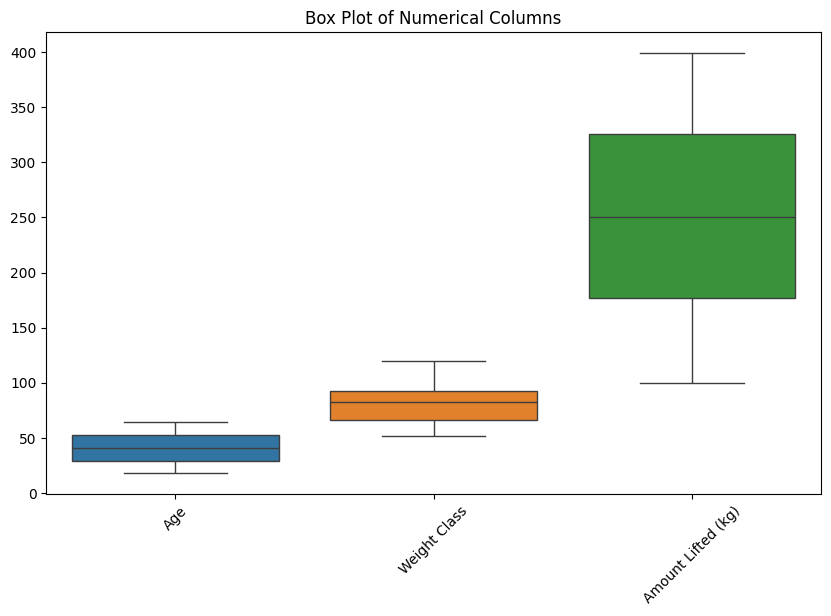

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [53]:
df.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

## Filter Data


In [77]:
# Filter rows where 'Amount Lifted (kg)' > 397, select relevant columns, and sort by 'Age' in descending order
filtered_df = df.loc[df['Amount Lifted (kg)'] > 397,['Age','Weight Class', 'Amount Lifted (kg)']].sort_values(by='Age', ascending=False )
filtered_df

,Age,Weight Class,Amount Lifted (kg)
12,64,74.0,398
696,63,59.0,398
585,58,74.0,399
2140,57,74.0,399
2105,57,93.0,399
2699,53,74.0,399
1207,51,93.0,399
1727,51,59.0,399
2976,48,83.0,399
308,42,105.0,398


In [81]:
# Filter rows where 'Amount Lifted (kg)' > 397 and 'Weight Class' < 60, then sort by 'Age' in descending order
filtered_df2 = df.loc[(df['Amount Lifted (kg)'] > 397) & (df['Weight Class'] < 60), ['Age', 'Weight Class', 'Amount Lifted (kg)']].sort_values(by='Age', ascending=False)
filtered_df2

,Age,Weight Class,Amount Lifted (kg)
696,63,59.0,398
1727,51,59.0,399
1827,40,59.0,398
2795,34,52.0,399
1427,29,59.0,398
